In [1]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%matplotlib inline
import urllib2
import numpy as np

np.set_printoptions(precision=3, suppress=True)
url = ('https://raw.githubusercontent.com/Upward-Spiral-Science'
       '/data/master/syn-density/output.csv')
data = urllib2.urlopen(url)
csv = np.genfromtxt(data, delimiter=",")[1:]

def check_condition(row):
    if row[3] == 0:
        return False
    return True

a = np.apply_along_axis(check_condition, 1, csv)
a = np.where(a == True)[0]
nonZeroMask = csv[a, :]

synDividedMask = np.divide(nonZeroMask[:,4],nonZeroMask[:,3])
synDividedMask = synDividedMask * (64**3)
accurateDataT = np.vstack((nonZeroMask[:,0],nonZeroMask[:,1],nonZeroMask[:,2],synDividedMask))
accurateData = accurateDataT.T

cleaned = accurateData[accurateData[:,0] >= 409]
cleaned = cleaned[cleaned[:,0] <= 3529]
cleaned = cleaned[cleaned[:,1] >= 1564]
cleaned = cleaned[cleaned[:,1] <= 3124]

length, width = cleaned.shape
print length
print width

36036
4


In [2]:
import math

divisionsx = np.unique(cleaned[:,0])
meanx = np.zeros((2,len(divisionsx)))

divisionsy = np.unique(cleaned[:,1])
meany = np.zeros((2,len(divisionsy)))

divisionsz = np.unique(cleaned[:,2])
meanz = np.zeros((2,len(divisionsz)))

maxlen = np.amax([len(divisionsx),len(divisionsy),len(divisionsz)])
xstep = np.divide(maxlen,len(divisionsx))
ystep = 2
zstep = 8

counter = 0
for d in divisionsx:
    slicex = cleaned[cleaned[:,0] == d]
    meanx[0,counter] = (counter)*xstep
    meanx[1,counter] = np.mean(slicex[:,3])
    counter += 1
    
counter = 0
for d in divisionsy:
    slicey = cleaned[cleaned[:,1] == d]
    meany[0,counter] = (counter)*ystep
    meany[1,counter] = np.mean(slicey[:,3])
    counter += 1
    
counter = 0
for d in divisionsz:
    slicez = cleaned[cleaned[:,2] == d]
    meanz[0,counter] = (counter)*zstep
    meanz[1,counter] = np.mean(slicez[:,3])
    counter += 1

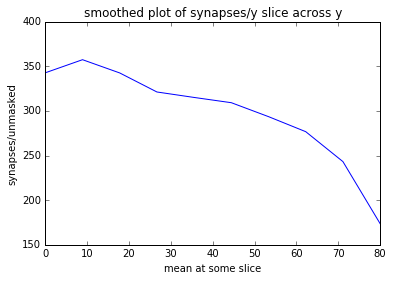

In [3]:
import time
from scipy.interpolate import UnivariateSpline

spl = UnivariateSpline(meany[0,:], meany[1,:])
xs = np.linspace(min(meany[0,:]), max(meany[0,:]), 10)
plt.plot(xs, spl(xs))
plt.title('smoothed plot of synapses/y slice across y')
plt.ylabel('synapses/unmasked')
plt.xlabel('mean at some slice')

[ 14.66  -14.845 -21.323  -6.117  -5.884 -15.616 -16.837 -33.526 -69.486]


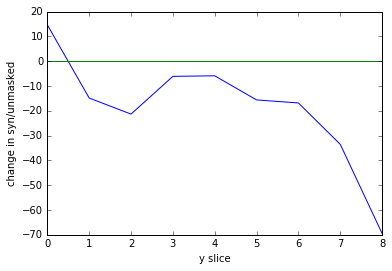

In [4]:
mean = spl(xs)
mean1 = mean[:-1]
mean2 = mean[1:]
meandiff = mean2 - mean1
print meandiff
fig,ax = plt.subplots()
ax.plot(meandiff)
ax.plot([0] * len(meandiff))
ax.set_xlabel('y slice')
ax.set_ylabel('change in syn/unmasked')
#ax.set_xticks(np.arange(0,40,10))
#ax.set_yticks(np.arange(-30,15,10))

#### If we look at the graph, we see how the middle section is separate from the edges. This implies that there are at least 3 sets of data for syn/unmasked across y - perhaps more in the middle.
#### This explains why we keep shifting between 3 and 4 clusters, since the middle section is somewhat uniform.

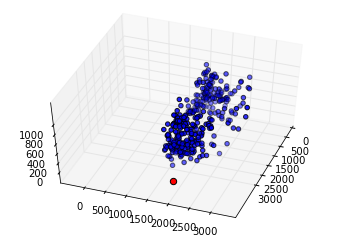

In [23]:
import Figtodat
from images2gif import writeGif
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

cleanedSyn = cleaned[cleaned[:,3].argsort()]

figure = plt.figure()
plot = figure.add_subplot(111, projection='3d')
plot.hold(False)
plot.view_init(elev=50, azim=20)
plot.set_xlabel('x axis')
plot.set_xticks(np.arange(0,4000,1000))
plot.set_ylabel('y axis')
plot.set_yticks(np.arange(1000,3500,1000))
plot.set_zlabel('z axis')
plot.set_zticks(np.arange(0,1500,500))
plot.set_title('Time points = increasing values of syn/unmasked')
images=[]
imageSteps = np.arange(0,99)
stepSize = len(cleaned)/len(imageSteps)
for i in imageSteps[:-1]:
    currImage = cleanedSyn[(stepSize*i):(stepSize*(i+1)),:]
    
    for i in currImage[:,1]:
        curr_y = currImage[currImage[:,1] == i]
        if (curr_y.size < 75):
            currImage = np.delete(currImage, curr_y, 1)    
    #print currImage.size
    
    plot.scatter(currImage[:,0],currImage[:,1],currImage[:,2]) 
    plot.hold(True)
    plot.scatter(4000,np.mean(currImage[:,1]),s = 40,c = 'r')
    plot.hold(False)
    im = Figtodat.fig2img(figure)
    images.append(im)
 
writeGif("Bijan_gif.gif",images,duration=0.1,dither=0)

### What does the jump at the end mean???